In [21]:
from minisomBatch import MiniSom
import pandas as pd
import numpy as np

#Loading the data
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
data = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')
target = data['target'].values
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
#print( data.columns[:-1] )
print( "Data before normalization:\n", data )
data = data[data.columns[:-1]]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

maxi = np.max(data)
mini = np.min(data)

data = (data - mini)/(maxi - mini)

print( "Data after normalization:\n", data )

np.min(data)


Data before normalization:
       area  perimeter  compactness  length_kernel  width_kernel  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     asymmetry_coefficient  length_kernel_groove  target  
0                    2.221                 5.220       1  
1                    1.018                 4.956 

0.0

In [22]:
#Random initialization of weights
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)

#Exploring the weights
print( "Weights shape: ", np.shape( som._weights ) )
print( "First neuron weights:\n", np.round( som._weights[0,0], 2 ) )
print( "First component of weights for all 9x9 neurons:\n", np.round( som._weights[0:9,0:9,0] , 2 ) )


print(np.shape(np.unique(som.winner(data), axis = 0)))
print(np.shape(np.unique( [ som.winner(d) for d in data ] , axis=0 )))

Weights shape:  (9, 9, 7)
First neuron weights:
 [0.55 0.72 0.6  0.54 0.42 0.65 0.44]
First component of weights for all 9x9 neurons:
 [[0.55 0.89 0.07 0.8  0.52 0.62 0.7  0.36 0.65]
 [0.14 0.98 0.12 0.57 0.67 0.83 0.58 0.7  0.69]
 [0.02 0.3  0.9  0.92 0.12 0.45 0.73 0.22 0.58]
 [0.31 0.23 0.18 0.99 0.38 0.19 0.21 0.28 0.4 ]
 [0.77 0.29 0.28 0.96 0.29 0.48 0.51 0.77 0.73]
 [0.25 0.06 0.38 0.26 0.04 0.65 0.13 0.88 0.33]
 [0.46 0.91 0.26 0.19 0.33 0.25 0.97 0.07 0.52]
 [0.83 0.97 0.23 0.37 0.24 0.7  0.42 0.27 0.4 ]
 [0.33 0.35 0.68 0.37 0.62 0.95 0.7  0.52 0.62]]
(16, 2)
(16, 2)


In [3]:
#Training
som.trainBatch(data, 13, verbose=True)  # random training


ITERATIONS
 [  0 / 13 ]   0% - ? it/st= 0 ; Iteration value= 0 ; winner= (4, 7) ; data iteration =  [ 1.42097769e-01  2.15462437e-01  6.06017918e-05  3.04218199e-01
  1.41701823e-01 -9.86151745e-01 -3.83577423e-01]
 [  1 / 13 ]   8% - 0:00:00 left t= 1 ; Iteration value= 1 ; winner= (8, 3) ; data iteration =  [ 0.01118803  0.00822376  0.42851527 -0.16862466  0.19743223 -1.7881662
 -0.92201349]
 [  2 / 13 ]  15% - 0:00:00 left t= 2 ; Iteration value= 2 ; winner= (6, 4) ; data iteration =  [-0.19206658 -0.36020056  1.44238325 -0.76363745  0.20804754 -0.66747933
 -1.18919199]
 [  3 / 13 ]  23% - 0:00:00 left t= 3 ; Iteration value= 3 ; winner= (6, 4) ; data iteration =  [-0.34709127 -0.47533316  1.03938133 -0.68897805  0.31950836 -0.96081795
 -1.2299826 ]
 [  4 / 13 ]  31% - 0:00:00 left t= 4 ; Iteration value= 4 ; winner= (8, 3) ; data iteration =  [ 0.44525718  0.33059504  1.37450924  0.06666556  0.80515903 -1.56349549
 -0.4753563 ]
 [  5 / 13 ]  38% - 0:00:00 left t= 5 ; Iteration val


Eta =  0.43333333333333335

Sigma =  1.3
Neighborhood shape:  (9, 9)
First neuron value of neighborhood:
 1.8075453590484802e-10
Neighborhood for all 9x9 neurons:
 [[0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.02 0.03 0.02 0.01 0.   0.   0.  ]
 [0.01 0.04 0.1  0.13 0.1  0.04 0.01 0.   0.  ]
 [0.02 0.1  0.24 0.32 0.24 0.1  0.02 0.   0.  ]
 [0.03 0.13 0.32 0.43 0.32 0.13 0.03 0.   0.  ]]


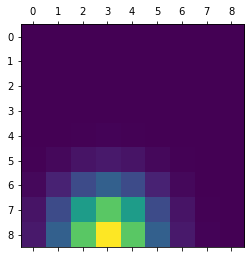

In [4]:
#LOOKING AT THE NEIGHBORHOOD FUNCTION (I just run part of update() manually)
t = 1
max_iteration = 13
win = (8,3)
eta = som._decay_function(som._learning_rate, t, max_iteration)
print( "\nEta = ", eta )
# sigma and learning rate decrease with the same rule
sig = som._decay_function(som._sigma, t, max_iteration)
print( "\nSigma = ", sig )
# improves the performances
g = som.neighborhood(win, sig)*eta
#Exploring the neighborhood function
print( "Neighborhood shape: ", np.shape( g ) )
print( "First neuron value of neighborhood:\n", g[0,0] )
print( "Neighborhood for all 9x9 neurons:\n", np.round(g,2) )

import matplotlib.pyplot as plt
plt.matshow( g )
plt.show()

In [5]:
list_win = som.winner(data)
print(list_win)

[(4, 7), (8, 3), (6, 4), (6, 4), (8, 3), (6, 4), (6, 4), (6, 4), (7, 1), (2, 5), (3, 1), (6, 4), (6, 4), (6, 4), (6, 4), (6, 4), (6, 4), (8, 3), (8, 3), (6, 4), (6, 5), (6, 5), (8, 3), (6, 5), (4, 7), (8, 3), (6, 4), (6, 4), (6, 4), (6, 4), (6, 5), (4, 7), (3, 1), (6, 4), (6, 5), (8, 3), (6, 1), (1, 1), (6, 4), (1, 3), (6, 4), (6, 4), (6, 4), (5, 1), (8, 3), (6, 4), (8, 3), (6, 4), (6, 4), (6, 5), (6, 4), (4, 5), (3, 1), (6, 4), (6, 5), (6, 5), (6, 4), (8, 3), (8, 3), (4, 7), (6, 4), (6, 4), (6, 4), (6, 4), (6, 4), (6, 4), (6, 5), (6, 5), (6, 5), (6, 5), (7, 1), (0, 1), (0, 1), (2, 3), (1, 8), (7, 0), (7, 1), (0, 1), (0, 1), (8, 6), (5, 8), (5, 7), (0, 1), (7, 1), (7, 1), (7, 1), (2, 5), (7, 1), (0, 1), (4, 3), (7, 1), (2, 5), (7, 1), (4, 3), (7, 1), (7, 1), (7, 1), (7, 1), (7, 1), (7, 1), (6, 8), (2, 3), (0, 1), (7, 1), (7, 1), (2, 3), (2, 3), (7, 1), (7, 1), (7, 1), (2, 5), (7, 1), (2, 5), (0, 1), (0, 1), (7, 1), (2, 3), (7, 1), (2, 5), (7, 1), (0, 1), (7, 1), (3, 6), (2, 3), (8, 3),

In [6]:
som._weights

array([[[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
         0.64589411, 0.43758721],
        [0.891773  , 0.96366276, 0.38344152, 0.79172504, 0.52889492,
         0.56804456, 0.92559664],
        [0.07103606, 0.0871293 , 0.0202184 , 0.83261985, 0.77815675,
         0.87001215, 0.97861834],
        [0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102,
         0.14335329, 0.94466892],
        [0.52184832, 0.41466194, 0.26455561, 0.77423369, 0.45615033,
         0.56843395, 0.0187898 ],
        [0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
         0.3595079 , 0.43703195],
        [0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256,
         0.1289263 , 0.31542835],
        [0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481,
         0.20887676, 0.16130952],
        [0.65310833, 0.2532916 , 0.46631077, 0.24442559, 0.15896958,
         0.11037514, 0.65632959]],

       [[0.13818295, 0.19658236, 0.36872517, 0.82099323, 0.09710128,
  

In [7]:
som._weights

array([[[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
         0.64589411, 0.43758721],
        [0.891773  , 0.96366276, 0.38344152, 0.79172504, 0.52889492,
         0.56804456, 0.92559664],
        [0.07103606, 0.0871293 , 0.0202184 , 0.83261985, 0.77815675,
         0.87001215, 0.97861834],
        [0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102,
         0.14335329, 0.94466892],
        [0.52184832, 0.41466194, 0.26455561, 0.77423369, 0.45615033,
         0.56843395, 0.0187898 ],
        [0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
         0.3595079 , 0.43703195],
        [0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256,
         0.1289263 , 0.31542835],
        [0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481,
         0.20887676, 0.16130952],
        [0.65310833, 0.2532916 , 0.46631077, 0.24442559, 0.15896958,
         0.11037514, 0.65632959]],

       [[0.13818295, 0.19658236, 0.36872517, 0.82099323, 0.09710128,
  

In [8]:
list_win = som.winner(data)

som.update( input_data = data, win_list = list_win , t = 5, max_iteration = 13)

In [32]:
a = som.train(data,20, verbose=True)
print(a)

 [ 20 / 20 ] 100% - 0:00:00 left 
 quantization error: 0.08172928951096056
None


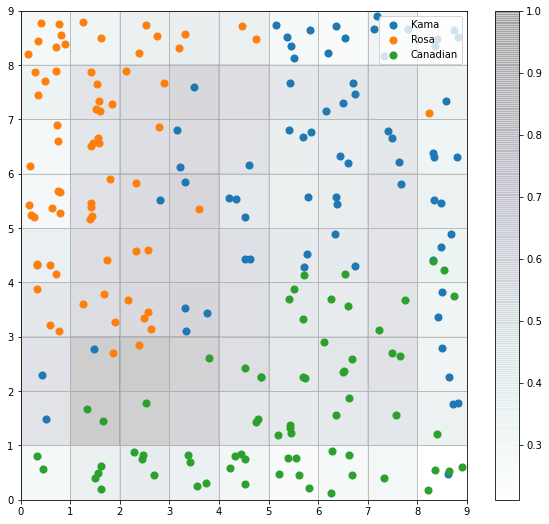

In [33]:
colors = ['C0', 'C1', 'C2']
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.show()

In [14]:
np.shape(np.unique( [ som.winner(d) for d in data ] , axis=0 ))

(56, 2)

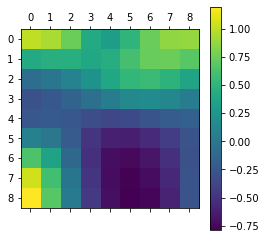

In [12]:
import matplotlib.pyplot as plt
plt.matshow( som._weights[:,:,6] )
plt.colorbar()
plt.show()
